# Urban Heat Island (UHI) Analysis
By Kaitlyn Hudenburg




## Background


UHI refers to the phenomenon where urban areas experience significantly higher temperatures than the surrounding region. This temperature difference is influenced by factors including the land cover, building density, energy consumption, and reduced vegetation. This analysis combines UHI intensity data from the Center for International Earth Science Information Network (CIESIN) at Columbia University and population data from SimpleMaps to quantify the impact of UHI intensity on urban areas.

## Introduction


This study explores the relationship between UHI intensity levels and urban populations. The analysis examines how UHI intensity varies across different city sizes and identifies the population exposed to elevated temperatures caused by this effect. UHI effects significantly impact environmental health by intensifying heat exposure, which can negatively affect air quality and increase the risk of heat-related illnesses. As urban populations continue to grow, quantifying the effects of UHI intensity is essential for addressing public health challenges, sustainable development, climate resilience, and urban planning.

In [ ]:
# Import libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import matplotlib
from shapely.geometry import Point

In [ ]:
# Load the dataset
df = pd.read_csv('sdei-global-uhi-2013.csv')

## Data Description

In [ ]:
# Preview the first few rows
df.head()

ISOURBID ISO3  URBID         NAME       SCHNM   ES90POP     ES95POP  \
0  JPN37372  JPN  37372        Tokyo       TOKYO  75437921  77047471.0   
1  MEX51793  MEX  51793  Mexico City  MEXICOCITY  21678056  24272856.0   
2  CHN49534  CHN  49534     Shenzhen    SHENZHEN  18243701  22028121.0   
3  USA28505  USA  28505     New York     NEWYORK  21864403  22505565.0   
4  IDN59607  IDN  59607      Jakarta     JAKARTA  12543930  15726634.0   

    ES00POP  SQKM_FINAL  URB_D_MEAN  BUF_D_MEAN  D_T_DIFF  URB_N_MEAN  \
0  78582895    43605.80       37.69       32.08      5.61       21.81   
1  26875405     4434.39       35.82       28.43      7.40        5.01   
2  26267183     9023.31       35.89       33.90      1.98       23.64   
3  23236034    25727.10       35.59       31.25      4.34       16.15   
4  19863559     4104.86       28.66       27.77      0.89       22.73   

   BUF_N_MEAN  N_T_DIFF   LATITUDE   LONGITUDE  
0       20.38      1.43  34.972671  136.389421  
1        5.20     -0.19  19.504818  -99.060949  
2       23.07      0.57  22.873056  113.579442  
3       14.58      1.56  40.681595  -74.015978  
4       21.46      1.27  -6.290612  106.765614

Below is the codebook for the columns of this df.

Column Name | Description
------------|-------
ISOURBID | Unique ID created by concatenating ISO3 code and Urban ID number (URBID)
ISO3 | International Standards Organization three-letter country code
URBID | Urban ID number
NAME | City or urban agglomeration name
SCHNM | City or urban agglomeration name in CAPS, concatenated, and without accents
ES90POP | Estimated population for 1990
ES95POP | Estimated population for 1995
ES00POP | Estimated population for 2000
SQKM_FINAL | Area of urban extent in square kilometers
URB_D_MEAN | Daytime average maximum land surface temperature within urban extent (degrees Celsius)
BUF_D_MEAN | Daytime average maximum land surface temperature within 10km buffer around urban extent (degrees Celsius)
D_T_DIFF | The difference (in degrees Celsius) in average daytime maximum land surface temperature between the urban area and buffer area (URB_D_MEAN minus BUF_D_MEAN)
URB_N_MEAN | Nighttime average minimum land surface temperature within urban extent (degrees Celsius)
BUF_N_MEAN | Nighttime average minimum land surface temperature within 10km buffer around urban extent (degrees Celsius)
N_T_DIFF | The difference (in degrees Celsius) in average nighttime minimum land surface temperature between the urban area and buffer area (URB_N_MEAN minus BUF_N_MEAN)
LATITUDE | Latitude of centroid of urban extent in decimal degrees
LONGITUDE | Longitude of centroid of urban extent in decimal degrees

The population in the df is estimated population data from 2000 and appears that further validation is needed. Population data from 2024 was added instead to ensure the analysis reflects the latest accurate data.

In [ ]:
# Preview the first few rows of the dataset
# The city name was changed to uppercase without spaces to merge properly with the df's SCHNM column

POP_data = pd.read_csv("worldcities.csv")
POP_data['city_ascii']=POP_data['city_ascii'].str.upper().str.replace(r'\s+', '', regex=True)
POP_data.head()

city city_ascii      lat       lng    country iso2 iso3   admin_name  \
0      Tokyo      TOKYO  35.6897  139.6922      Japan   JP  JPN        Tōkyō   
1    Jakarta    JAKARTA  -6.1750  106.8275  Indonesia   ID  IDN      Jakarta   
2      Delhi      DELHI  28.6100   77.2300      India   IN  IND        Delhi   
3  Guangzhou  GUANGZHOU  23.1300  113.2600      China   CN  CHN    Guangdong   
4     Mumbai     MUMBAI  19.0761   72.8775      India   IN  IND  Mahārāshtra   

   capital  population          id  
0  primary  37732000.0  1392685764  
1  primary  33756000.0  1360771077  
2    admin  32226000.0  1356872604  
3    admin  26940000.0  1156237133  
4    admin  24973000.0  1356226629

In [ ]:
# Population data from 2024 was added to the df by merging by city names
df = df.merge(POP_data, left_on="SCHNM", right_on="city_ascii", how="left")
df.head()

ISOURBID ISO3  URBID         NAME       SCHNM   ES90POP     ES95POP  \
0  JPN37372  JPN  37372        Tokyo       TOKYO  75437921  77047471.0   
1  MEX51793  MEX  51793  Mexico City  MEXICOCITY  21678056  24272856.0   
2  CHN49534  CHN  49534     Shenzhen    SHENZHEN  18243701  22028121.0   
3  USA28505  USA  28505     New York     NEWYORK  21864403  22505565.0   
4  IDN59607  IDN  59607      Jakarta     JAKARTA  12543930  15726634.0   

    ES00POP  SQKM_FINAL  URB_D_MEAN  ...  city_ascii      lat       lng  \
0  78582895    43605.80       37.69  ...       TOKYO  35.6897  139.6922   
1  26875405     4434.39       35.82  ...  MEXICOCITY  19.4333  -99.1333   
2  26267183     9023.31       35.89  ...    SHENZHEN  22.5415  114.0596   
3  23236034    25727.10       35.59  ...     NEWYORK  40.6943  -73.9249   
4  19863559     4104.86       28.66  ...     JAKARTA  -6.1750  106.8275   

         country  iso2  iso3        admin_name  capital  population  \
0          Japan    JP   JPN             Tōkyō  primary  37732000.0   
1         Mexico    MX   MEX  Ciudad de México  primary  21804000.0   
2          China    CN   CHN         Guangdong    minor  17619000.0   
3  United States    US   USA          New York      NaN  18908608.0   
4      Indonesia    ID   IDN           Jakarta  primary  33756000.0   

             id  
0  1.392686e+09  
1  1.484248e+09  
2  1.156159e+09  
3  1.840034e+09  
4  1.360771e+09  

[5 rows x 28 columns]

In [ ]:
# Duplicates were dropped
duplicates = df[df.duplicated(subset=['SCHNM'], keep=False)]
df = df.drop_duplicates(subset=['SCHNM'], keep='first')

According to CIESIN, UHI intensity is defined as the summer temperature (°C) differential between an urban area and a buffer of 10km surrounding the urban area based on land surface temperature (column named D_T_DIFF). Urban and buffer temperature differential was filtered to only include positive UHI intensity values to address urban areas affected by urban heating rather than cooling.

In [ ]:
df = df.dropna(subset=['D_T_DIFF'])
df = df[df['D_T_DIFF'] > 0]
df["D_T_DIFF"].describe().round(2)

count    19856.00
mean         1.52
std          1.31
min          0.01
25%          0.60
50%          1.20
75%          2.08
max         16.71
Name: D_T_DIFF, dtype: float64

The average temperature difference between urban areas and relative buffer is 1.5°C, with 75% of cases falling below 2°C. With maximum values exceeding 16°C, the data indicates that a smaller subset of urban areas face a significantly higher UHI intensity level, which is crucial for urban planners and policymakers to identify and address areas disproportionately affected by UHI effects.

In [ ]:
# This analysis incldues only settlepoints with a population of over 50,000 to allow for more accurate findings

df = df[df["population"] > 50000]
df["population"] = df["population"].astype(int)
df["population"].describe().apply(lambda x: f"{x:,.0f}")

count         3,809
mean        650,512
std       2,004,605
min          50,011
25%          76,092
50%         133,497
75%         352,000
max      37,732,000
Name: population, dtype: object

## Analysis

UHI Intensity is grouped into three categories

1. **Severe** includes urban areas with an urban and buffer temperature difference exceeding 5°C
2. **High** includes urban areas with an urban and buffer temperature difference greater than 2°C but less than or equal to 5°C
3. **Low** includes urban areas with an urban and buffer temperature difference equal to or less than 2°C

In [ ]:
# UHI Intensity are grouped into severe, high, and low categories
df.loc[:,'UHI_Cat'] = df['D_T_DIFF'].apply(lambda x: 'Severe' if x > 5 else ('High' if 2 < x <= 5 else 'Low'))
UHI_Cat_Order = ['Severe', 'High', 'Low']
df['UHI_Cat'] = pd.Categorical(df['UHI_Cat'], categories=UHI_Cat_Order, ordered=True)
print(df[['SCHNM', 'D_T_DIFF', 'UHI_Cat']])

            SCHNM  D_T_DIFF UHI_Cat
0           TOKYO      5.61  Severe
1      MEXICOCITY      7.40  Severe
2        SHENZHEN      1.98     Low
3         NEWYORK      4.34    High
4         JAKARTA      0.89     Low
...           ...       ...     ...
38750     GLAZOUE      0.44     Low
38767      PERERE      0.36     Low
38773      MATERI      1.26     Low
38774   BOUKOUMBE      1.74     Low
38777     SINENDE      0.67     Low

[3809 rows x 3 columns]


In [ ]:
# Urban areas are plotted on the map according to UHI
# Zoom in and click on the map to locate areas of interest
gdf=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["LONGITUDE"], df["LATITUDE"]))
gdf.head()

color_map ={
    'Severe': 'red',
    'High': 'orange',
    'Low': 'blue'}

m = folium.Map(location=[gdf["LATITUDE"].mean(), gdf["LONGITUDE"].mean()], zoom_start=3, tiles="CartoDB Positron", width=1200, height=1000)
heat_data = gdf[["LATITUDE", "LONGITUDE", "D_T_DIFF"]].dropna().values.tolist()
HeatMap(heat_data, radius=1, blur=1, max_zoom=1,).add_to(m)

for idx,row in df.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        color=color_map.get(row['UHI_Cat'], 'gray'),
        fill=True,
        fill_color=color_map[row["UHI_Cat"]],
        fill_opacity=0.7,
        popup=row["NAME"]
        ).add_to(m)
m

Urban areas are categorized into three groups

1. **Large**
    Includes urban areas with a population over 5 million
2. **Medium**
    Includes urban areas with a population over 1 million but less than or equal to 5 million
3. **Small**
    Includes urban areas with a population less than 1 million

In [ ]:
# Create city categories of Large, Medium, and Smale
median_pop = df['population'].median()
df.loc[:, 'city_size'] = df['population'].apply(lambda x: 'Large' if x > 5000000 else ('Medium' if 1000000 < x <= 5000000 else 'Small'))

# Display the UHI categories by city size
UHI_City_Size = pd.crosstab(df["UHI_Cat"], df["city_size"])
print("\n")
print("UHI Category by City Size:")
print(UHI_City_Size)



UHI Category by City Size:
city_size  Large  Medium  Small
UHI_Cat                        
Severe         7       9     91
High          47     188    958
Low           40     171   2298


In [ ]:
# Severe UHI accounts for 7% of large cities, whereas severe UHI accounts for medium and small cities only 2%
city_counts = df.groupby('city_size').size().reset_index(name='total_cities')
severe_UHI_counts = df[df['UHI_Cat'] == 'Severe'].groupby('city_size').size().reset_index(name='severe_cities')
city_size_counts = pd.merge(city_counts, severe_UHI_counts, on='city_size', how='left')
city_size_counts['severe_percent'] = ((city_size_counts['severe_cities'] / city_size_counts['total_cities']) * 100).round(1)
print(city_size_counts[['city_size', 'severe_percent']])

  city_size  severe_percent
0     Large             7.4
1    Medium             2.4
2     Small             2.7


In [ ]:
avg_UHI_size = df.groupby('city_size')['D_T_DIFF'].mean().round(2)
print(avg_UHI_size)

city_size
Large     2.32
Medium    2.19
Small     1.71
Name: D_T_DIFF, dtype: float64


The findings show that on average, large cities have a higher UHI intensity than medium and small cities. Small cities have an average lower UHI level, but greater variation which could be attributed to data collection challenges

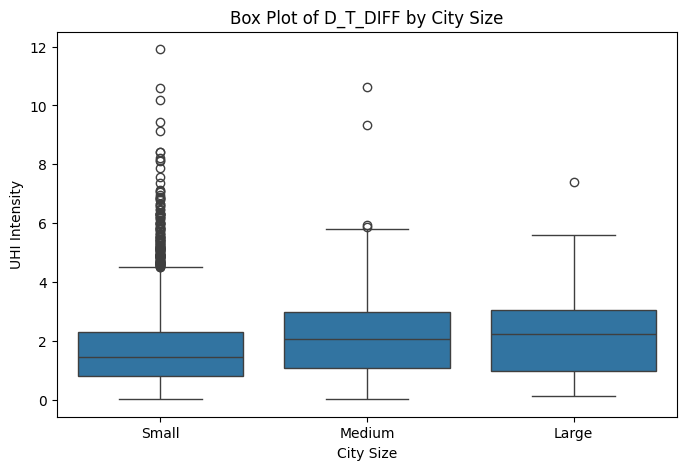

In [ ]:
# Plot the UHI intensity distribution per city size
plt.figure(figsize=(8, 5))
sns.boxplot(x='city_size', y='D_T_DIFF', data=df, order=['Small', 'Medium', 'Large'])
plt.title('Box Plot of D_T_DIFF by City Size')
plt.xlabel('City Size')
plt.ylabel('UHI Intensity')
plt.show()

In [ ]:
# Display top largest cities with the highest UHI intensity
severe_cities = df[df['UHI_Cat'] == 'Severe']
severe_L_cities = df[(df['city_size'] == 'Large') & (df['UHI_Cat'] == 'Severe')]
severe_L_cities = severe_L_cities[['SCHNM', 'D_T_DIFF', 'population', 'city_size']].sort_values(by='D_T_DIFF', ascending=False)

print(f"The total population of large cities affected with severe UHI: {severe_L_cities['population'].sum():,}")
print("\n")
print(severe_L_cities)

The total population of large cities affected with severe UHI: 108,779,533


           SCHNM  D_T_DIFF  population city_size
1     MEXICOCITY      7.40    21804000     Large
0          TOKYO      5.61    37732000     Large
76       TORONTO      5.61     5647656     Large
1123     XINYANG      5.30     6234401     Large
434       SUZHOU      5.30     5324476     Large
71      SHENYANG      5.05     7964000     Large
13      SHANGHAI      5.02    24073000     Large


In [ ]:
print(f"The total population of urban areas affected with severe UHI: {severe_cities['population'].sum():,}")

The total population of urban areas affected with severe UHI: 151,101,564




There is an insignificant positive correlation between UHI Intensity and relative population, urban area extent, and latitude of the urban area.




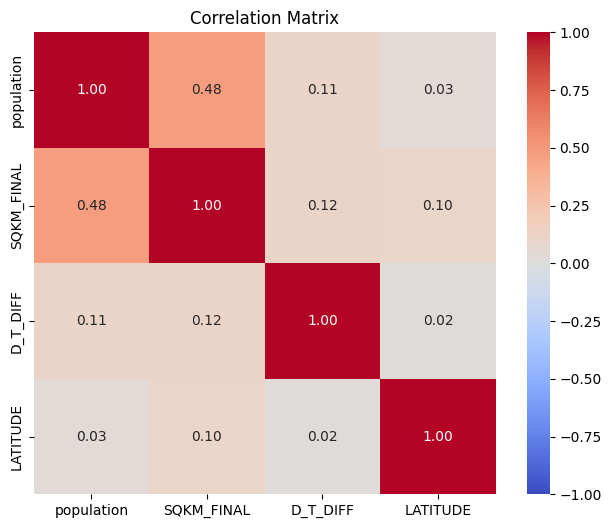

In [ ]:
# Create a correlation matrix to visualize relationship between variables
corr_col = ['population', 'SQKM_FINAL', 'D_T_DIFF', 'LATITUDE']
corr_col = df[corr_col]
correlation_matrix = corr_col.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, square=True, cmap='coolwarm', fmt=".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
print("\n")
print("There is an insignificant positive correlation between UHI Intensity and relative population, urban area extent, and latitude of the urban area.")
print("\n")
plt.show()

## Conclusion

This study examined the relationship between UHI intensity and urban population. A larger proportion of large cities exhibit elevated UHI intensity levels based on population, although population and UHI intensity had an insignificant positive correlation. The urban area extent and latitude of the urban areas also had an insignificant positive correlation.

Further research should incorporate green space distribution and land use data to assess their impact on UHI intensity mitigation. The urban area extent included in the df may not reflect the most recent urban developments as urban areas continue to expand.

The findings highlight that over 150 million people are directly being affected by severe UHI levels across the globe. As urban populations continue to grow, the need to research and implement UHI mitigation strategies is crucial in improving public health, environmental quality, and sustainable urban development.

## Source Citation

Df data set:
Center for International Earth Science Information Network (CIESIN), Columbia University. 2016. Global Urban Heat Island (UHI) Data Set, 2013. Palisades, NY: NASA Socioeconomic Data and Applications Center (SEDAC). http://dx.doi.org/10.7927/H4H70CRF. Accessed 10 March 2025.


2024 population data was collected from SimpleMaps at https://simplemaps.com/data/world-cities.